In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin
from random import uniform, choice
from sklearn.linear_model import LinearRegression

In [8]:
# configurations
DP_COUNT = 500
DP_DIV   = 1
DP_NOISE = (-100.0, +100.0)

x_train  = [ (i / DP_DIV) for i in range(0, DP_COUNT) ]

y_linear = [ 2 * x_i  + uniform(DP_NOISE[0], DP_NOISE[1]) for x_i in x_train ]
y_sin    = [ sin(x_i) + uniform(DP_NOISE[0], DP_NOISE[1]) for x_i in x_train ]

# pick one:
y_train  = y_linear

print("len(x_train) =", len(x_train))
print("len(y_train) =", len(y_train))

len(x_train) = 500
len(y_train) = 500


In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html#numpy-reshape

model = LinearRegression().fit(
    np.reshape(
        x_train,
        # can also pass -1 to keep the dimension on that dim as is
        (DP_COUNT, 1)
    ),
    np.reshape(y_train, (-1, 1)),
)

# y = ax + b
a = model.coef_[0][0]
b = model.intercept_[0]

print("mode.coef      =", model.coef_)
print("mode.intercept =", model.intercept_)

mode.coef      = [[1.99947288]]
mode.intercept = [0.41366596]


In [5]:
# randomly pick N elements and compare the predicition results
TEST_COUNT = 10
x_test = []
y_test = []

# a trick to make "choice" work
x_train_iter_list = list(enumerate(x_train))
for _ in range(TEST_COUNT):
    idx, val = choice(x_train_iter_list)
    x_test.append(val)
    y_test.append(y_train[idx])

# i don't like numpy arrays and floats, so convert the result to a simple array/list:
y_predict = [ float(i[0]) for i in model.predict( np.reshape(x_test, (-1, 1)) ) ]

print("x_test    =", x_test)
print("y_test    =", y_test)
print("y_predict =", y_predict)

x_test    = [186.0, 391.0, 384.0, 262.0, 306.0, 269.0, 401.0, 171.0, 38.0, 28.0]
y_test    = [445.6542784791857, 749.8858525055571, 740.0215302503257, 546.3181968674442, 523.361649519506, 630.9144776333203, 706.4483407889376, 281.813291744896, 107.81223632268814, -3.8163996243957357]
y_predict = [372.31562150949605, 782.207561770449, 768.2112516151969, 524.2755603379469, 612.2523670281028, 538.271870493199, 802.2022905636663, 342.32352831967023, 76.39363536988118, 56.39890657666396]


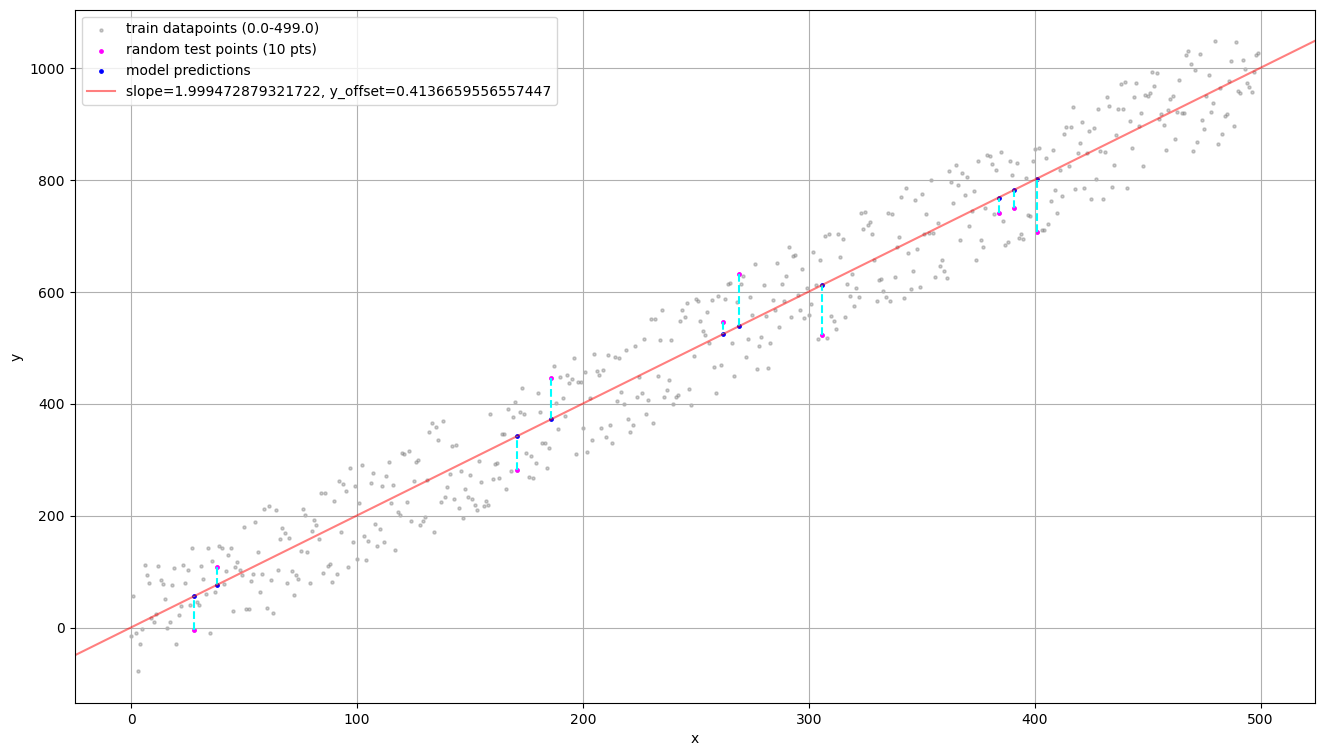

In [6]:
# Plot
plt.figure(figsize=(16, 9))
plt.scatter(
    x_train, y_train,
    s=5, color="gray",
    alpha=0.4,
    label=f"train datapoints ({x_train[0]}-{x_train[-1]})"
)

plt.scatter(
    x_test, y_test,
    s=6, color="magenta",
    label=f"random test points ({TEST_COUNT} pts)"
)

plt.scatter(
    x_test, y_predict,
    s=6, color="blue",
    label="model predictions"
)

# annotate model predictions and actual test results
for i in range(0, len(x_test)):
    plt.plot(
        [ x_test[i], x_test[i]    ],
        [ y_test[i], y_predict[i] ],
        color="cyan",
        linestyle='dashed'
    )
    # TODO: add MSE label
    # plt.annotate('Label', (x_test[i], y_test[i]))

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html#matplotlib-pyplot-axline
# matplotlib.pyplot.axline(xy1, xy2=None, *, slope=None, **kwargs)
# Add an infinitely long straight line.
# The line can be defined either by two points xy1 and xy2, or by one point xy1 and a slope
plt.axline(
    (x_train[0], a * x_train[0] + b),
    slope=a,
    color="red", alpha=0.5,
    label=f"slope={a}, y_offset={b}",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.grid()
plt.show()